# Análisis de datos de una tienda de ventas al por menor
## Introducción
El siguiente informe analizará de manera profunda una tienda de ventas en línea al por menor, en el que se responderán las preguntas propuestas por el creador de la base de datos. Este dataset fue obtenido de Kaggle, y a su vez cuenta con alto grado de usabilidad.

## Preguntas para explorar
* ¿Cómo influyen la edad y el sexo de los clientes en su comportamiento de compra?
* ¿Existen patrones discernibles en las ventas a lo largo de distintos periodos de tiempo?
* ¿Qué categorías de productos atraen más a los clientes?
* ¿Qué relación existe entre la edad, el gasto y las preferencias de producto?
* ¿Cómo adaptan los clientes sus hábitos de compra a las tendencias estacionales?
* ¿Existen comportamientos de compra distintos en función del número de artículos comprados por transacción?
* ¿Qué conclusiones pueden extraerse de la distribución de los precios de los productos dentro de cada categoría?

## Previsualización del dataset
A continuación, abriremos esta base de datos para conocer qué datos y categorías contiene para así hacer una idea sobre lo que podríamos incluir en nuestro EDA (análisis de datos exploratorio).


In [15]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Leer archivos
retail_sales = pd.read_csv('./../PPP/retail_sales_dataset.csv')

In [17]:
# Previsualizar archivo
retail_sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [18]:
# Tamaño de los datos
retail_sales.shape

(1000, 9)

Contamos con 1000 filas y 9 columnas, en las que podemos ver datos como la fecha, el género del comprador, la categoría del producto, la cantidad, el precio, entre otros. Esto brinda más claridad sobre los patrones y tendencias analizar a lo largo de este informe.

In [19]:
# Búsqueda de valores nulos
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [20]:
# Estadísticas
retail_sales.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


En el código anterior, lo que se hizo fue mostrar las estadísticas de los datos numéricos de la tabla; se destacan datos como el conteo, el promedio, mínimos, máximos y cuartiles.

## Influencia de la edad y sexo en el patrón de compra
En este subíndice, se le dará respuesta a la primera pregunta propuesta que nos dice: ¿Cómo influyen la edad y el sexo de los clientes en su comportamiento de compra?

In [21]:
# Relación Edad - Producto
bins = [10, 29, 39, 49, 59, 64] 
labels = ['18-29', '30-39', '40-49', '50-59', '60+'] 
retail_sales['Age Group'] = pd.cut(retail_sales['Age'], bins=bins, labels=labels)
resultado = retail_sales.groupby(['Age Group', 'Product Category'])['Quantity'].sum().reset_index()
resultado = resultado.sort_values(by=['Age Group', 'Quantity'], ascending=[True, False])
resultado = resultado.drop_duplicates(subset='Age Group', keep='first')

print(resultado)

   Age Group Product Category  Quantity
0      18-29           Beauty       215
5      30-39      Electronics       176
7      40-49         Clothing       219
11     50-59      Electronics       202
14       60+      Electronics       111


C:\Users\RAAR\AppData\Local\Temp\ipykernel_568\1764840321.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = retail_sales.groupby(['Age Group', 'Product Category'])['Quantity'].sum().reset_index()


De acuerdo al resultado del código anterior, las categorías más cdemandadas por rango de edad son:
* 18-29: Belleza - 215 unidades
* 30-39: Electrónicos - 176 unidades
* 40-49: Ropa - 219 unidades
* 50-59: Electrónicos - 202 unidades
* 60+: Electrónicos - 111 unidades

In [22]:
# Relación Género - Producto
result = retail_sales.groupby(['Gender', 'Product Category'])['Quantity'].sum().reset_index()
result = result.sort_values(by=['Gender', 'Quantity'], ascending=[True, False])
result = result.drop_duplicates(subset='Gender', keep='first')

print(result)

   Gender Product Category  Quantity
1  Female         Clothing       441
4    Male         Clothing       453


La categoría más demandada tanto por hombres como mujeres es Ropa, donde los hombres son mayoría con 453 productos comprados contra 441.

## Patrones de venta durante el tiempo
En este apartado, responderemos la segunda pregunta propuesta que cuestiona: ¿Existen patrones discernibles en las ventas a lo largo de distintos periodos de tiempo?


In [23]:
# Fecha
retail_sales.sort_values(by='Date', ascending=False, inplace=True) 
print(retail_sales)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
649             650  2024-01-01     CUST650    Male   55      Electronics   
210             211  2024-01-01     CUST211    Male   42           Beauty   
856             857  2023-12-31     CUST857    Male   60      Electronics   
907             908  2023-12-29     CUST908    Male   46           Beauty   
804             805  2023-12-29     CUST805  Female   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
162             163  2023-01-02     CUST163  Female   64         Clothing   
978             979  2023-01-02     CUST979  Female   19           Beauty   
558             559  2023-01-01     CUST559  Female   40         Clothing   
521             522  2023-01-01     CUST522    Male   46           Beauty   
179             180  2023-01-01     CUST180    Male   41         Clothing   

     Quantity  Price per Unit  Total Amount Age Group  
649         1      

La primera fecha de nuestra tabla es el 1 de enero de 2023 y la última es el 1 de enero de 2024, esto nos servirá para crear los rangos de las fechas.

In [24]:
# Patrones de compra por mes del año
retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])
compras_por_mes = retail_sales.groupby(retail_sales['Date'].dt.to_period('M'))[['Quantity', 'Total Amount']].sum().reset_index()
compras_por_mes_ord = compras_por_mes.sort_values('Total Amount', ascending= False)
print(compras_por_mes_ord)

       Date  Quantity  Total Amount
4   2023-05       259         53150
9   2023-10       252         46580
11  2023-12       207         44690
1   2023-02       214         44060
7   2023-08       227         36960
5   2023-06       197         36715
6   2023-07       176         35465
0   2023-01       195         35450
10  2023-11       205         34920
3   2023-04       214         33870
2   2023-03       194         28990
8   2023-09       170         23620
12  2024-01         4          1530


Como se puede observar, los meses en los que la empresa vendió más fue en mayo y en octubre, sin embargo, es posible evidenciar que la ganancia ingresada no va acorde a la cantidad de productos vendidos, se puede ver el caso de meses que venden muchos productos pero generan menos ingresos, como lo son por ejemplo agosto, noviembre, entre otros.

## Productos más demandados
En esta sección, analizaremos los productos más demandados por los clientes por cantidad y lo más exitosos en términos de ingresos, por lo que responderemos la siguiente pregunta: ¿Qué categorías de productos atraen más a los clientes?

In [27]:
# Productos más demandados (por cantidad y por ventas)
demandado_por_cantidad = retail_sales.groupby('Product Category')['Quantity'].sum().reset_index()
demandado_por_ventas = retail_sales.groupby('Product Category')['Total Amount'].sum().reset_index()
mas_demandado_por_cantidad = demandado_por_cantidad[demandado_por_cantidad['Quantity'] == demandado_por_cantidad['Quantity'].max()]
mas_demandado_por_ventas = demandado_por_ventas[demandado_por_ventas['Total Amount'] == demandado_por_ventas['Total Amount'].max()]

print("Categoría más demandada por cantidad:")
print(mas_demandado_por_cantidad)

print("\nCategoría más demandada por ventas:")
print(mas_demandado_por_ventas)


Categoría más demandada por cantidad:
  Product Category  Quantity
1         Clothing       894

Categoría más demandada por ventas:
  Product Category  Total Amount
2      Electronics        156905


Es posible observar que la categoría producto más demandada por los clientes son las prendas de vestir, en el que se vendieron 894 productos, sin embargo, el que más ingreso generó a la tienda fueron los electrodomésticos, con más de $156000 dólares ingresado, tiene sentido ya que este tipo de productos son más costosos que la ropa.

## Relación Edad - Gasto - Preferencia
En esta parte del informe se buscarán los patrones y tendencias en relación a Edad - Gasto - Preferencia respondiendo la siguiente pregunta: ¿Qué relación existe entre la edad, el gasto y las preferencias de producto?

In [31]:
retail_sales['Age'] = pd.to_numeric(retail_sales['Age'], errors='coerce')   
bins = [18, 30, 45, 60, float('inf')] 
labels = ['18-30', '31-45', '46-60', '60+'] 
result = retail_sales.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().reset_index()

result = result.sort_values(by=['Age Group', 'Total Amount'], ascending=[True, False])
result = result.drop_duplicates(subset='Age Group', keep='first')

print(result)

   Age Group Product Category  Total Amount
1      18-29         Clothing         46150
3      30-39           Beauty         33385
6      40-49           Beauty         34645
11     50-59      Electronics         37935
14       60+      Electronics         24065


C:\Users\RAAR\AppData\Local\Temp\ipykernel_568\484693194.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = retail_sales.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().reset_index()


Quienes se encuentran en el grupo más joven, gastan más en Ropa y además es el grupo que más gasta. Quienes menos gastan son el grupo de mayor edad, cuya categoría favorita son los Electrodomésticos y en estos le han generado ingresos en ventas de más de $24000 dólares.

## Tendencias por estación
Llegó el momento de analizar las tendencias de compra de los clientes por estación del año, repsondiendo a la pregunta que dice: ¿Cómo adaptan los clientes sus hábitos de compra a las tendencias estacionales?

In [34]:
retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])
def get_season(date):
    if date.month in [3, 4, 5]: 
        return 'Primavera'
    elif date.month in [6, 7, 8]:  
        return 'Verano'
    elif date.month in [9, 10, 11]:  
        return 'Otoño'
    else:  
        return 'Invierno'

retail_sales['Season'] = retail_sales['Date'].apply(get_season)
result = retail_sales.groupby(['Season', 'Product Category'])['Quantity'].sum().reset_index()
result = result.sort_values(by=['Season', 'Quantity'], ascending=[True, False])
result = result.drop_duplicates(subset='Season', keep='first')

print(result)


       Season Product Category  Quantity
2    Invierno      Electronics       228
5       Otoño      Electronics       228
7   Primavera         Clothing       301
11     Verano      Electronics       212


El producto favorito del público son los Electrodomésticos, que son los más vendidos en 3 de las 4 estaciones del año, a excepción de Primavera, que es a su vez la categoría que más vendió en términos de cantidad, con 301.

## Comportamientos de compra
En este caso, analizaremos diferentes variables para responder la siguiente pregunta: ¿Existen comportamientos de compra distintos en función del número de artículos comprados por transacción?

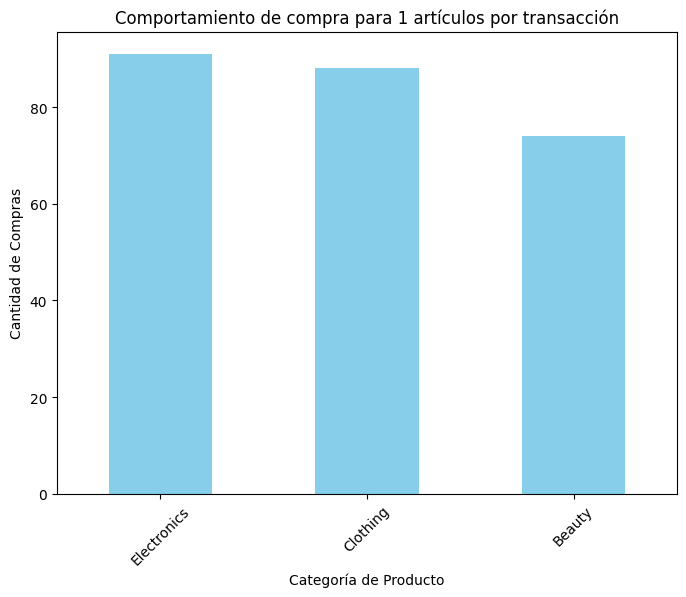

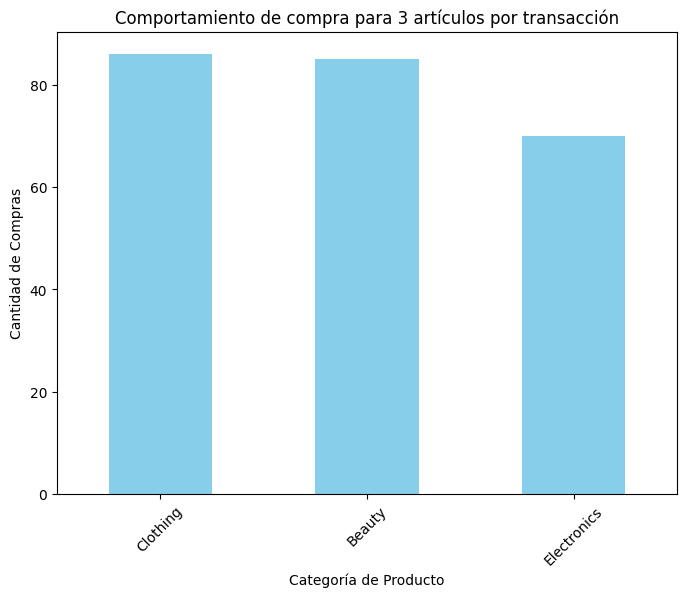

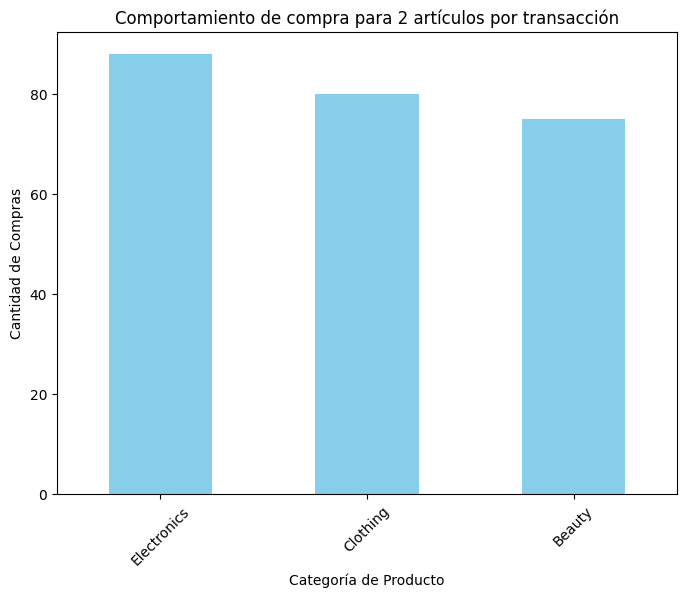

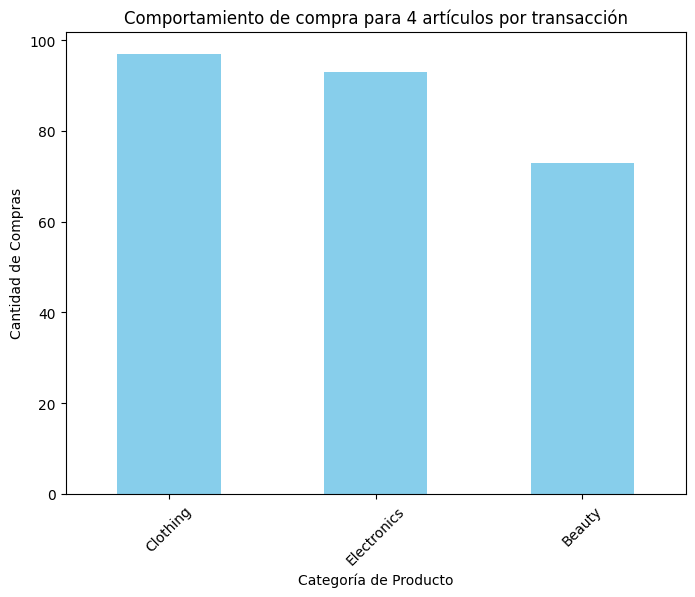

In [36]:
retail_sales['Average Price per Unit'] = retail_sales['Total Amount'] / retail_sales['Quantity']
retail_sales['Transaction Size'] = retail_sales.groupby('Transaction ID')['Quantity'].transform('sum')
transaction_sizes = retail_sales['Transaction Size'].unique()

for size in transaction_sizes:
    subset = retail_sales[retail_sales['Transaction Size'] == size]
    category_counts = subset['Product Category'].value_counts()
    
    plt.figure(figsize=(8, 6))
    category_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Comportamiento de compra para {size} artículos por transacción')
    plt.xlabel('Categoría de Producto')
    plt.ylabel('Cantidad de Compras')
    plt.xticks(rotation=45)
    plt.show()


Cuando se trata de comprar 1 o 2 productos por transacción, es evidente la fuerte tendencia de adquirir electrodomésticos, ya que por su elevado precio, resulta difícil para el comprador hacerse con más productos cuando sus compras son más grandes, y eso se ve evidenciado cuando se compran 3 o 4 artículos, en donde los clientes prefieren comprar ropa o artículos de belleza en grandes cantidades.

## Distribución de precio por categoría
Por último investigaremos acerca de la distribución de los precios unitarios por cada una de las tres categorías respondiendo la útlima pregunta prouesta: ¿Qué conclusiones pueden extraerse de la distribución de los precios de los productos dentro de cada categoría?

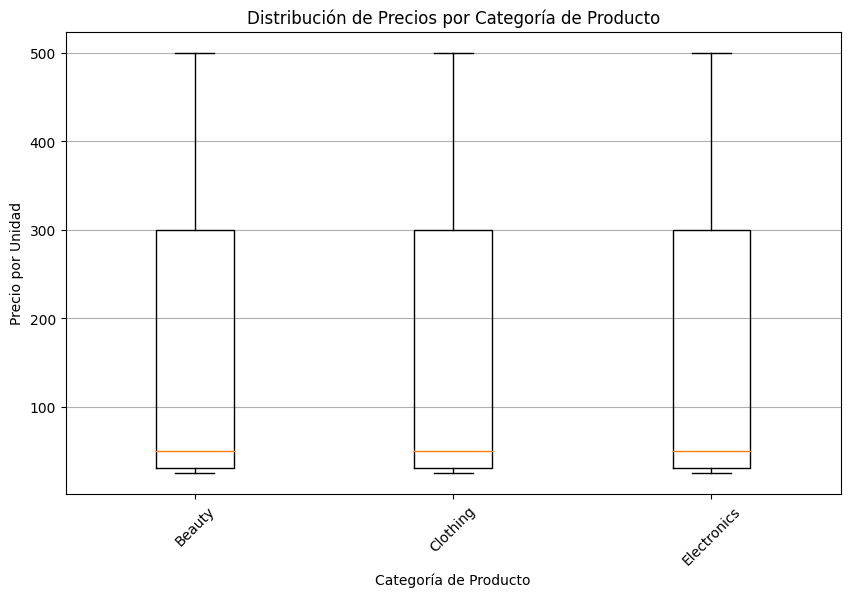

In [38]:
grouped = retail_sales.groupby('Product Category')
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Distribución de Precios por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio por Unidad')
plt.grid(True, axis='y')
plt.boxplot([group['Price per Unit'] for _, group in grouped], labels=grouped.groups.keys())

plt.show()
plt.show()

Podemos interpretar la gráfica de la siguiente forma: El precio máximo de producto de cualquier categoría es de $500 y el mínimo es de $25, la mediana es de $50, el cuartil superior es de $300 y el cuartil inferior es de $30. Gracias a estos datos, es posible inferir que los precios sobre $500 no son datos atípicos y tampoco datos comunes, ya que se hacen muy pocas compras de productos que tengan ese valor; también es posible averiguar que las compras más comunes son de productos con precios bajos, debido a que la mediana es muy baja, por lo que el volumen de compra está muy concentrado en ellos. Existe una gran diferencia entre $300 y $500, porque que no existen productos con un precio entre este rango (o cuestan $300 o $500, mas no existen productos de 350, 400, 450, etc.).